In [4]:
# from qiskit import QuantumCircuit, QuantumRegister
# import numpy as np

# # load a dummy circuit
# # generate network of random cnots
# n, M = 4, 8
# N = n**2
# register = QuantumRegister(N)
# qc = QuantumCircuit(register)

# for _ in range(M):
#     qc.cx(*np.random.choice(N, 2, replace=False))
# qc.name = "random cx circuit"
# qc.decompose().draw("mpl")

In [16]:
from transpile_benchy.main import Benchmark
from qiskit.transpiler import CouplingMap
from virtual_swap.pass_managers import SabreCNSV2, Baseline, SabreQiskit, BruteCNS

coupling = CouplingMap.from_heavy_hex(5)
# t0 = Baseline(coupling)
t0 = SabreQiskit(coupling)
t1 = SabreCNSV2(coupling)
# t2 = BruteCNS(coupling)

b = Benchmark(t0, t1, size="medium", prepath="../../../transpile_benchy")
# b = Benchmark(t0, t1, circuit_list=[qc])
b.run()

# plot and save as svg
b.plot(save=True)

print(b.depth_list)

  0%|          | 0/20 [00:00<?, ?it/s]

Running multiplier_n15


In [6]:
from qiskit import QuantumCircuit

b = Benchmark(t0, t1, size="small", prepath="../../../transpile_benchy")
qasm = b.load_qasm_files()[5]

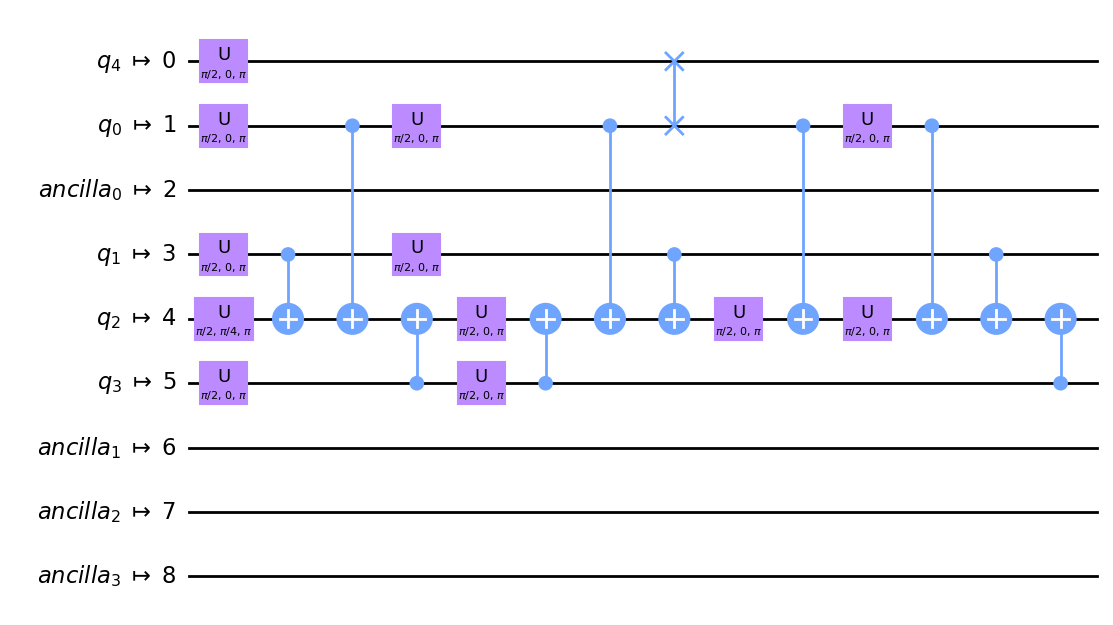

In [7]:
from qiskit import QuantumCircuit

b = Benchmark(t0, t1, size="small", prepath="../../../transpile_benchy")
qasm = b.load_qasm_files()[0]
qc = QuantumCircuit.from_qasm_file(qasm)
qc.remove_final_measurements()
qc.name = qasm.split("/")[-1].split(".")[0]
t0.run(qc).draw("mpl")

Accepted CNS subs 6


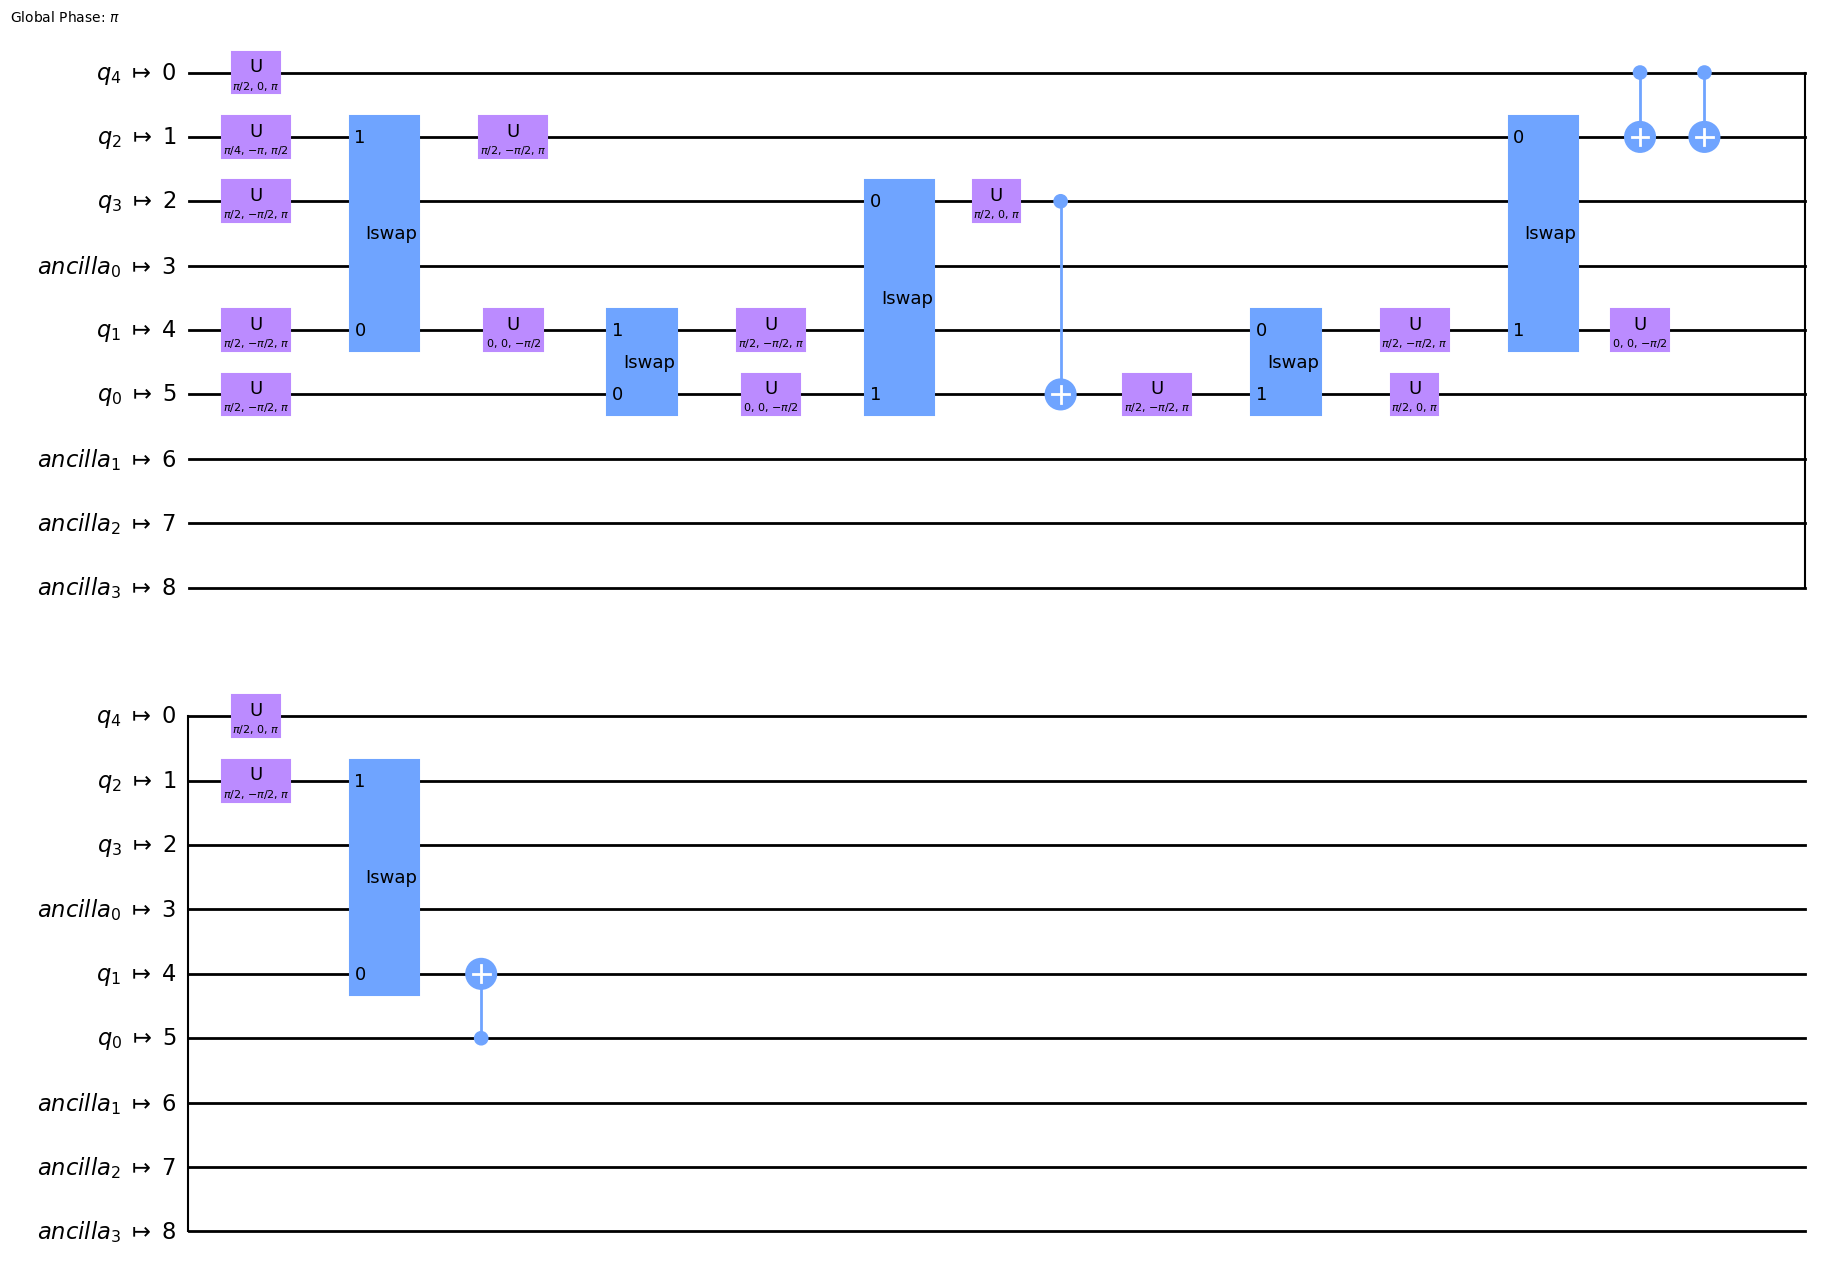

In [8]:
t1.run(qc).draw("mpl")